In [1]:
import os
import pandas as pd
import json
import numpy as np
import pickle
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer
from datasets import load_from_disk, load_metric, Dataset, load_dataset

In [2]:
from tsne_visual import visualize_layerwise_embeddings

In [9]:
print(os.getcwd())
os.chdir("..")
print(os.getcwd())

/zhome/94/5/127021/speciale/master_project/src/visualization
/zhome/94/5/127021/speciale/master_project/src


## Only if new model check :

In [4]:
checkpoint = '/work3/s174498/finetuning-sentiment-model-test-head3/checkpoint-500'

model = RobertaForSequenceClassification.from_pretrained(checkpoint,output_hidden_states = True,return_dict = True,)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /work3/s174498/finetuning-sentiment-model-test-head3/checkpoint-500 and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# load
datadir = '/work3/s174498/sst2_dataset/'

test_dataset = load_from_disk(datadir + 'test_dataset')

checkpoint = '/work3/s174498/finetuning-sentiment-model-test-head3/checkpoint-500'

# tokenizer
tokenizer_checkpoint = RobertaTokenizer.from_pretrained(checkpoint) 
# model
model = RobertaForSequenceClassification.from_pretrained(checkpoint,output_hidden_states = True,return_dict = True,)# output_attentions = True, 

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /work3/s174498/finetuning-sentiment-model-test-head3/checkpoint-500 and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Prepare the text inputs for the model
def preprocess_function(examples):
    return tokenizer_checkpoint(examples["sentence"], truncation=True)

tokenized_test = test_dataset.map(preprocess_function, batched=True)

Loading cached processed dataset at /work3/s174498/sst2_dataset/test_dataset/cache-8b3237970a80d0d5.arrow


In [7]:
run = Flase
if run:
    trainer = Trainer(
            model=model,                        
            tokenizer=tokenizer_checkpoint
        )
    output = trainer.predict(tokenized_test)

    with open(f'/work3/s174498/roberta_files/output_head3.pickle', 'wb') as handle:
        pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: sentence, idx. If sentence, idx are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1821
  Batch size = 8


In [ ]:
with open('/work3/s174498/roberta_files/output_head3.pickle', 'rb') as handle:
    output = pickle.load(handle)

In [4]:
with open('/work3/s174498/roberta_files/output_roberta_base.pickle', 'rb') as handle:
    output_pretrained = pickle.load(handle)


/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


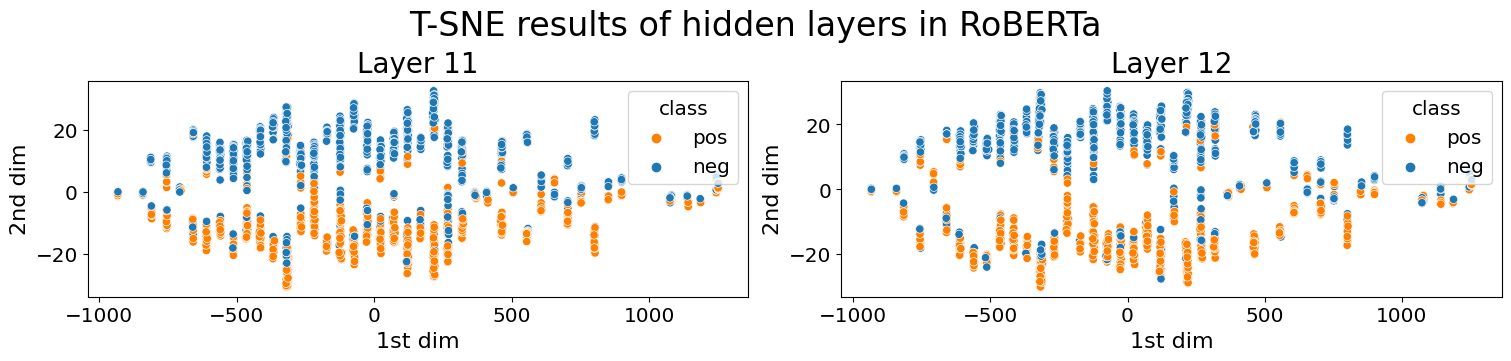

In [10]:
hidden_states = output.predictions[1][1:]
labels = output.label_ids
title = 'head_results'
layers_to_visualize = [10,11]
perplexity = 10
init = 'pca'
visualize_layerwise_embeddings(hidden_states,labels,title,layers_to_visualize, perplexity, init, save = False)